In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Task 1

In [3]:
path = '/content/drive/MyDrive/Galaxies HandsOn Sessions/HandsOnSession5'
path_task1 = path + '/Hands-on Session 5/Env_colors_Task1'

In [4]:
file_task1 = fits.open(path_task1+'/SDSS_EnvCatalogue.fits')

In [5]:
file_task1[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  104 / width of table in bytes                        
NAXIS2  =                19344 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   18 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'OBJID   '           / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TTYPE2  = 'Ra      '           / label for column 2                             
TFORM2  = 'D       '        

In [6]:
table1 = file_task1[1].data
ra = table1['Ra']
dec = table1['Dec']

Text(0, 0.5, 'Dec')

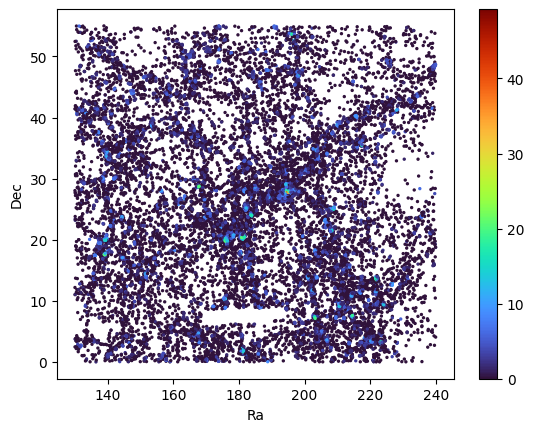

In [7]:
fig, ax = plt.subplots()
plt.scatter(ra, dec, marker='o', s=2, c=table1['dens_05'], cmap='turbo')
plt.colorbar()
ax.set_xlabel('Ra')
ax.set_ylabel('Dec')

In [8]:
# average density
H0 = 67.7 #km/s*Mpc
c = 3e5 #km/s

delta_ra = max(np.deg2rad(ra)) - min(np.deg2rad(ra))
delta_dec = np.sin(max(np.deg2rad(dec))) - np.sin(min(np.deg2rad(dec)))

solid_angle = delta_ra * delta_dec #sr

redshift = table1['redshift']
dist_max = max(redshift)*c/H0  #Mpc
dist_min = min(redshift)*c/H0
cylinder_depth = 1000/H0 #all cylinders = 1000 km/s
cylinder_area = np.pi*0.5**2 #Mpc^2

V = 1/3 * solid_angle * (dist_max**3 - dist_min**3) #Mpc^3

N = len(redshift) #number of galaxies

mean_sigma = N/V * cylinder_depth
local_sigma = table1['dens_05']

overdensity = local_sigma/mean_sigma
overd_log = np.log10(1 + overdensity)

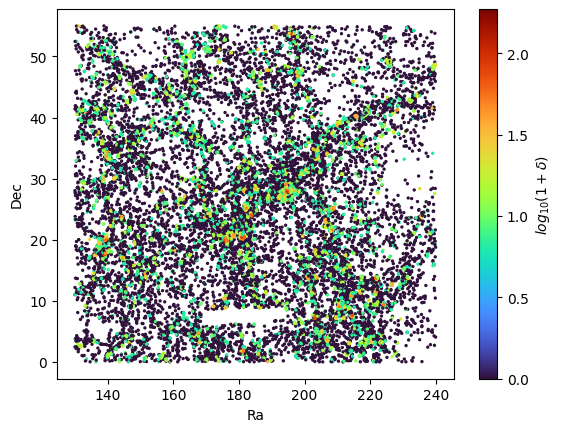

In [9]:
fig, ax = plt.subplots()
plt.scatter(ra, dec, marker='o', s=2, c=overd_log, cmap='turbo')
cbar = plt.colorbar()
ax.set_xlabel('Ra')
ax.set_ylabel('Dec')
cbar.set_label(r'$log_{10}(1+\delta)$')

In [10]:
from scipy.optimize import curve_fit

def line(x, a, b):
  y = a*x + b
  return y

In [11]:
#color-mass diagrams

mass = table1['mass']
color = table1['gp'] - table1['ip']

mass_mask1 = (mass > 6)
mass_mask2 = (mass < 13)
tot_mass_mask = mass_mask1 & mass_mask2

color_mask1 = (color > -2)
color_mask2 = (color < 2)
tot_color_mask = color_mask1 & color_mask2

cond1 = (overd_log < 0.05)

cond2 = (overd_log > 0.05)
cond3 = (overd_log < 1)

cond4 = (overd_log > 1)
cond5 = (overd_log < 1.3)

cond6 = (overd_log > 1.3)

overd_bin0 = overd_log[cond1 & tot_mass_mask & tot_color_mask]
overd_bin1 = overd_log[cond2 & cond3 & tot_mass_mask & tot_color_mask]
overd_bin2 = overd_log[cond4 & cond5 & tot_mass_mask & tot_color_mask]
overd_bin3 = overd_log[cond6 & tot_mass_mask & tot_color_mask]

color_bin0 = color[cond1 & tot_mass_mask & tot_color_mask]
color_bin1 = color[cond2 & cond3 & tot_mass_mask & tot_color_mask]
color_bin2 = color[cond4 & cond5 & tot_mass_mask & tot_color_mask]
color_bin3 = color[cond6 & tot_mass_mask & tot_color_mask]

mass_bin0 = mass[cond1 & tot_mass_mask & tot_color_mask]
mass_bin1 = mass[cond2 & cond3 & tot_mass_mask & tot_color_mask]
mass_bin2 = mass[cond4 & cond5 & tot_mass_mask & tot_color_mask]
mass_bin3 = mass[cond6 & tot_mass_mask & tot_color_mask]

(array([10643.,     0.,     0.,  3132.,  1922.,  1638.,  1144.,   536.,
          247.,    82.]),
 array([0.        , 0.22708748, 0.45417497, 0.68126245, 0.90834993,
        1.13543741, 1.3625249 , 1.58961238, 1.81669986, 2.04378735,
        2.27087483]),
 <BarContainer object of 10 artists>)

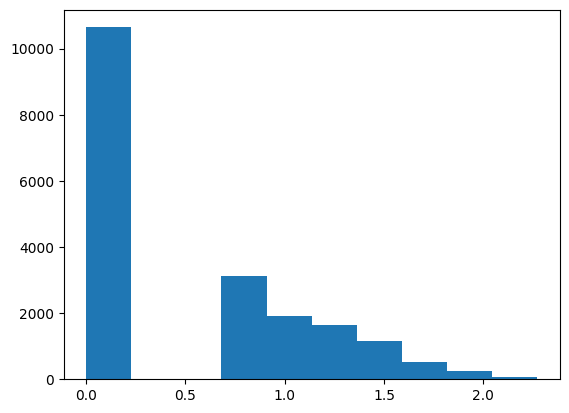

In [12]:
fig, ax = plt.subplots()
ax.hist(overd_log)

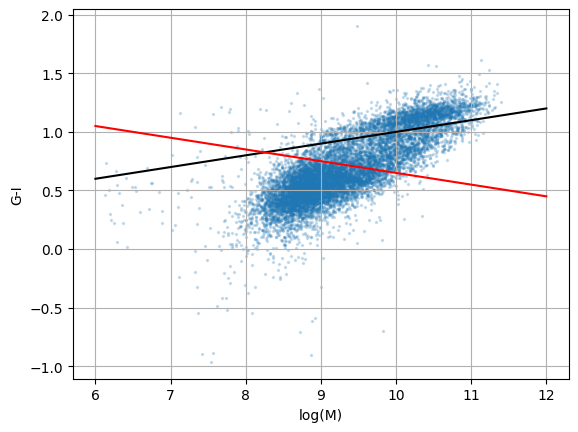

In [13]:
x = np.linspace(6, 12, len(mass_bin0))
y = line(x, 0.1, 0)
y2 = line(x, -0.1, 1.65)

fig, ax = plt.subplots()
plt.scatter(mass_bin0, color_bin0, s=2, alpha=0.2)
plt.plot(x, y, color='black')
plt.plot(x, y2, color='red')
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

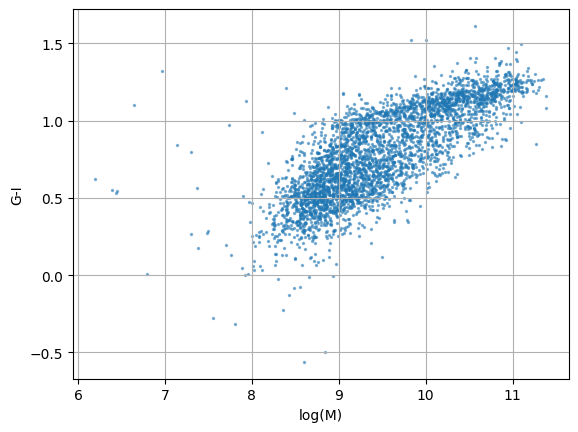

In [14]:
fig, ax = plt.subplots()
plt.scatter(mass_bin1, color_bin1, s=2, alpha=0.5)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

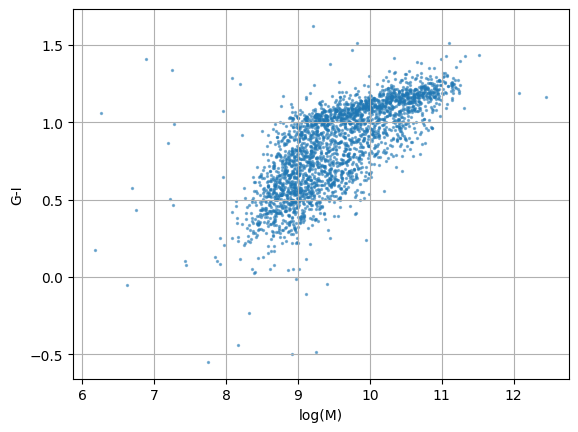

In [15]:
fig, ax = plt.subplots()
plt.scatter(mass_bin2, color_bin2, s=2, alpha=0.5)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

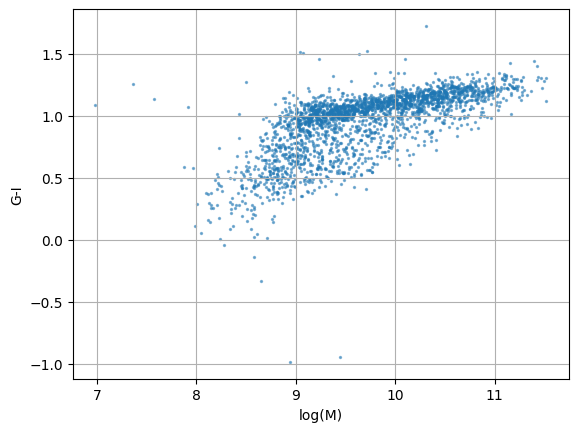

In [16]:
fig, ax = plt.subplots()
plt.scatter(mass_bin3, color_bin3, s=2, alpha=0.5)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

In [17]:
y_at_mass_bin0 = line(mass_bin0, 0.1, 0)
y2_at_mass_bin0 = line(mass_bin0, -0.1, 1.65)

y_at_mass_bin1 = line(mass_bin1, 0.1, 0)
y2_at_mass_bin1 = line(mass_bin1, -0.1, 1.65)

y_at_mass_bin2 = line(mass_bin2, 0.1, 0)
y2_at_mass_bin2 = line(mass_bin2, -0.1, 1.65)

y_at_mass_bin3 = line(mass_bin3, 0.1, 0)
y2_at_mass_bin3 = line(mass_bin3, -0.1, 1.65)

# Red population: color > y
red_bin0 = color_bin0[color_bin0 > y_at_mass_bin0]
red_mass_bin0 = mass_bin0[color_bin0 > y_at_mass_bin0]

red_bin1 = color_bin1[color_bin1 > y_at_mass_bin1]
red_mass_bin1 = mass_bin1[color_bin1 > y_at_mass_bin1]

red_bin2 = color_bin2[color_bin2 > y_at_mass_bin2]
red_mass_bin2 = mass_bin2[color_bin2 > y_at_mass_bin2]

red_bin3 = color_bin3[color_bin3 > y_at_mass_bin3]
red_mass_bin3 = mass_bin3[color_bin3 > y_at_mass_bin3]

# Blue population: color < y2
blue_bin0 = color_bin0[color_bin0 < y2_at_mass_bin0]
blue_mass_bin0 = mass_bin0[color_bin0 < y2_at_mass_bin0]

blue_bin1 = color_bin1[color_bin1 < y2_at_mass_bin1]
blue_mass_bin1 = mass_bin1[color_bin1 < y2_at_mass_bin1]

blue_bin2 = color_bin2[color_bin2 < y2_at_mass_bin2]
blue_mass_bin2 = mass_bin2[color_bin2 < y2_at_mass_bin2]

blue_bin3 = color_bin3[color_bin3 < y2_at_mass_bin3]
blue_mass_bin3 = mass_bin3[color_bin3 < y2_at_mass_bin3]

# Green population: y2 <= color <= y
green_bin0 = color_bin0[(color_bin0 >= y2_at_mass_bin0) & (color_bin0 <= y_at_mass_bin0)]
green_mass_bin0 = mass_bin0[(color_bin0 >= y2_at_mass_bin0) & (color_bin0 <= y_at_mass_bin0)]

green_bin1 = color_bin1[(color_bin1 >= y2_at_mass_bin1) & (color_bin1 <= y_at_mass_bin1)]
green_mass_bin1 = mass_bin1[(color_bin1 >= y2_at_mass_bin1) & (color_bin1 <= y_at_mass_bin1)]

green_bin2 = color_bin2[(color_bin2 >= y2_at_mass_bin2) & (color_bin2 <= y_at_mass_bin2)]
green_mass_bin2 = mass_bin2[(color_bin2 >= y2_at_mass_bin2) & (color_bin2 <= y_at_mass_bin2)]

green_bin3 = color_bin3[(color_bin3 >= y2_at_mass_bin3) & (color_bin3 <= y_at_mass_bin3)]
green_mass_bin3 = mass_bin3[(color_bin3 >= y2_at_mass_bin3) & (color_bin3 <= y_at_mass_bin3)]

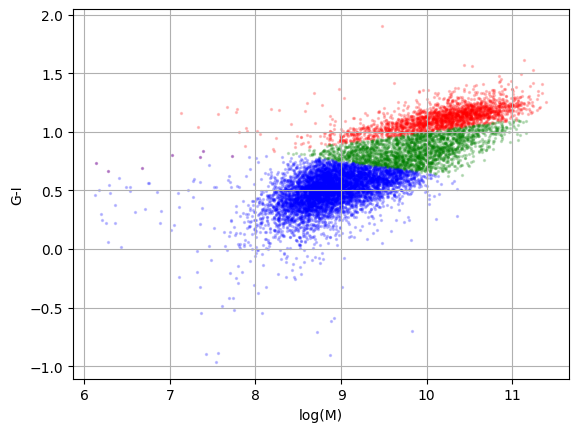

In [18]:
fig, ax = plt.subplots()
plt.scatter(red_mass_bin0, red_bin0, color='red', s=2, alpha=0.2)
plt.scatter(green_mass_bin0, green_bin0, color='green', s=2, alpha=0.2)
plt.scatter(blue_mass_bin0, blue_bin0, color='blue', s=2, alpha=0.2)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

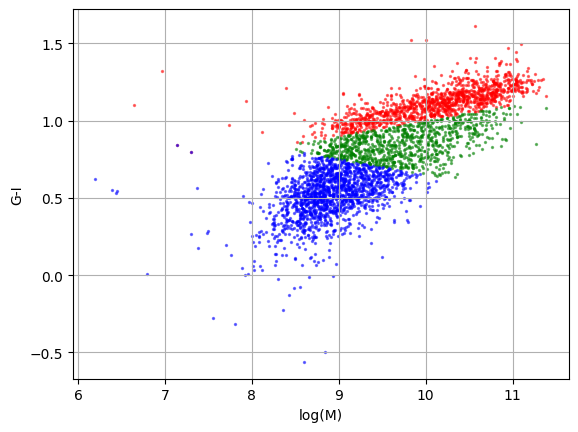

In [19]:
fig, ax = plt.subplots()
plt.scatter(red_mass_bin1, red_bin1, color='red', s=2, alpha=0.5)
plt.scatter(green_mass_bin1, green_bin1, color='green', s=2, alpha=0.5)
plt.scatter(blue_mass_bin1, blue_bin1, color='blue', s=2, alpha=0.5)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

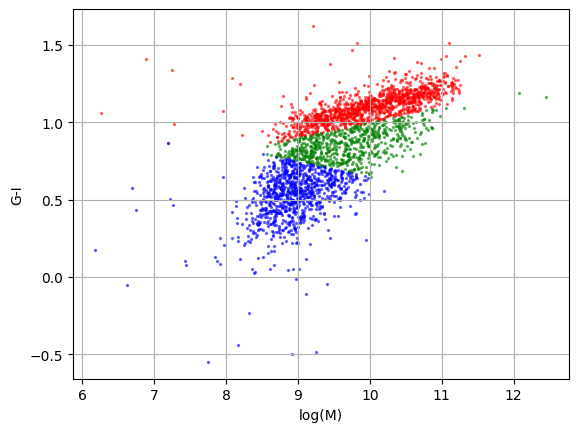

In [20]:
fig, ax = plt.subplots()
plt.scatter(red_mass_bin2, red_bin2, color='red', s=2, alpha=0.5)
plt.scatter(green_mass_bin2, green_bin2, color='green', s=2, alpha=0.5)
plt.scatter(blue_mass_bin2, blue_bin2, color='blue', s=2, alpha=0.5)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

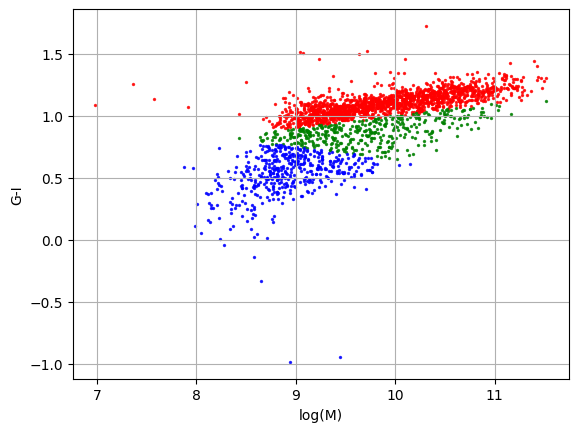

In [21]:
fig, ax = plt.subplots()
plt.scatter(red_mass_bin3, red_bin3, color='red', s=2, alpha=0.8)
plt.scatter(green_mass_bin3, green_bin3, color='green', s=2, alpha=0.8)
plt.scatter(blue_mass_bin3, blue_bin3, color='blue', s=2, alpha=0.8)
ax.set_xlabel('log(M)')
ax.set_ylabel('G-I')
ax.grid()

In [22]:
#red and blue fraction in each overdensity bin

N_bin0 = len(color_bin0)
N_bin1 = len(color_bin1)
N_bin2 = len(color_bin2)
N_bin3 = len(color_bin3)

red_frac_bin0 = len(red_bin0)/N_bin0
red_frac_bin1 = len(red_bin1)/N_bin1
red_frac_bin2 = len(red_bin2)/N_bin2
red_frac_bin3 = len(red_bin3)/N_bin3

blue_frac_bin0 = len(blue_bin0)/N_bin0
blue_frac_bin1 = len(blue_bin1)/N_bin1
blue_frac_bin2 = len(blue_bin2)/N_bin2
blue_frac_bin3 = len(blue_bin3)/N_bin3

green_frac_bin0 = len(green_bin0)/N_bin0
green_frac_bin1 = len(green_bin1)/N_bin1
green_frac_bin2 = len(green_bin2)/N_bin2
green_frac_bin3 = len(green_bin3)/N_bin3

blue_frac = (blue_frac_bin0, blue_frac_bin1, blue_frac_bin2, blue_frac_bin3)
red_frac = (red_frac_bin0, red_frac_bin1, red_frac_bin2, red_frac_bin3)
green_frac = (green_frac_bin0, green_frac_bin1, green_frac_bin2, green_frac_bin3)

In [23]:
overd_bin_centers = [(min(overd_bin0) + max(overd_bin0))/2, (min(overd_bin1) + max(overd_bin1))/2, (min(overd_bin2) + max(overd_bin2))/2, (min(overd_bin3) + max(overd_bin3))/2]

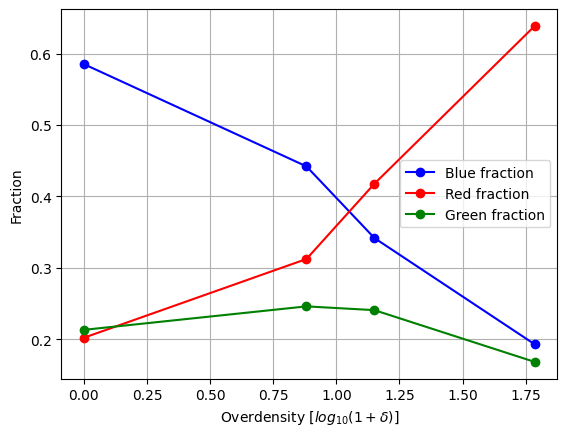

In [24]:
fig, ax = plt.subplots()
plt.plot(overd_bin_centers, blue_frac, color='blue', marker='o' ,label='Blue fraction')
plt.plot(overd_bin_centers, red_frac, color='red', marker='o', label='Red fraction')
plt.plot(overd_bin_centers, green_frac, color='green', marker='o', label='Green fraction')
ax.set_xlabel(r'Overdensity [$log_{10}(1+\delta)$]')
ax.set_ylabel('Fraction')
ax.grid()
ax.legend()

# Task 2

In [136]:
import glob

path_task2 = path+'/Hands-on Session 5/Env_Qtime_Task2'

region_files = glob.glob(path_task2+'/Spec_N4330_region'+'*.fits')

model_files = glob.glob(path_task2+'/Models_N4330_region'+'*.fits')

In [64]:
def extract_model_data(file):
  f = fits.open(file)

  next = f[0].header['NEXT']
  wave = f[0].data

  mod_photom = []
  mod_Qtau = []
  mod_Qage = []
  mod_spectra = []

  for ext in np.arange(1, next + 1):
    thisext = f[ext]
    thishead = thisext.header

    this_spec = thisext.data[0]

    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']

    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],
    thishead['MODU'],thishead['MODG'],
    thishead['MODI'],thishead['MODZ'],
    thishead['MODIR1'],thishead['MODIR4']))

    mod_photom.append(photarr)
    mod_Qtau.append(Qtau)
    mod_Qage.append(Qage)
    mod_spectra.append(this_spec)

  return wave, mod_spectra, mod_photom, mod_Qtau, mod_Qage

In [27]:
def extract_region_data(file):
  f = fits.open(file)

  flux = f[0].data
  err = f[1].data
  wave = f[2].data

  return wave, flux, err

In [137]:
# First index = which region
# 2nd index = which model
# Example: complete_model_dict['Flux'][0][3] is the flux given by the 3rd model for the 0th region (region 1 in the files)

complete_model_dict = {}
complete_model_dict['Wavelength'] = []
complete_model_dict['Flux'] = []
complete_model_dict['Qage'] = []
complete_model_dict['Qtau'] = []
complete_model_dict['Constants'] = []
complete_model_dict['Chi2_Integral'] = []
complete_model_dict['Photometry'] = []
complete_model_dict['Photo_Chi2_Integral'] = []

#Easier: index = which region
complete_region_dict = {}
complete_region_dict['Wavelength'] = []
complete_region_dict['Flux'] = []
complete_region_dict['Error'] = []

In [138]:
for f in model_files:
  file_wave, file_flux, file_photom, file_Qtau, file_Qage = extract_model_data(f)

  complete_model_dict['Wavelength'].append(file_wave)
  complete_model_dict['Flux'].append(file_flux)
  complete_model_dict['Qage'].append(file_Qage)
  complete_model_dict['Qtau'].append(file_Qtau)
  complete_model_dict['Photometry'].append(file_photom)

In [139]:
for r in region_files:
  file_wave, file_flux, file_err = extract_region_data(r)
  complete_region_dict['Wavelength'].append(file_wave)
  complete_region_dict['Flux'].append(file_flux)
  complete_region_dict['Error'].append(file_err)

In [140]:
for i in range(len(complete_model_dict['Flux'])):
  model_list = complete_model_dict['Flux'][i]
  this_region_flux = complete_region_dict['Flux'][i]
  this_region_constants = []

  for j in range(len(model_list)):
    this_model_flux = model_list[j]
    # print(len(this_model_flux))
    # print(len(this_region_flux))

    this_model_constant = np.mean(this_model_flux/this_region_flux, axis=0)
    this_region_constants.append(this_model_constant)

  complete_model_dict['Constants'].append(this_region_constants)

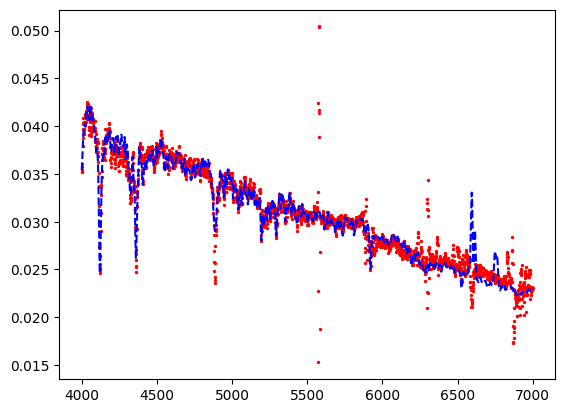

In [ ]:
fig, ax = plt.subplots()
plt.scatter(complete_region_dict['Wavelength'][1], complete_region_dict['Flux'][1], color='red', s=2)
plt.plot(complete_model_dict['Wavelength'][1][0], complete_model_dict['Flux'][1][0]/complete_model_dict['Constants'][1][0], color='blue', linestyle='dashed')

In [126]:
def chi2(x, model_x, sigma):
  num = (x - model_x)**2
  den = sigma**2
  chi = num/den

  return chi

In [127]:
def calc_region_chi2_integ(region_spectrum_models, region_flux, region_err, region_constants):
  '''
  Calculates the integral of the chi2 distribution for a certain region

  region_spectrum_models = flux of the models for this region
  region_flux = the true flux of this region
  region_err = the uncertainty on the flux
  region_constants = the normalization constants for the models of this region
  '''

  this_region_chi2 = []

  for i in range(len(region_spectrum_models)):
    this_model_chi2 = chi2(region_flux, region_spectrum_models[i]/region_constants[i], region_err)
    this_region_chi2.append(this_model_chi2)

  this_region_integs = [] #integral for each model of this region

  for chi in this_region_chi2:
    integ = np.sum(chi)
    this_region_integs.append(integ)

  return this_region_integs

In [116]:
len(complete_model_dict['Photometry'][0][0])

8

In [128]:
def calc_chi2integ_photometry(region_photo_data, region_photo_models, region_photo_errs):
  this_region_chi2 = []

  for i in range(len(region_photo_models)):
    this_model_chi2 = chi2(region_photo_data, region_photo_models[i], region_photo_errs)
    this_region_chi2.append(this_model_chi2)

  this_region_integs = [] #integral for each model of this region

  for chi in this_region_chi2:
    integ = np.sum(chi)
    this_region_integs.append(integ)

  return this_region_integs

In [141]:
for i in range(len(complete_model_dict['Flux'])):
  this_region_integ = calc_region_chi2_integ(complete_model_dict['Flux'][i], complete_region_dict['Flux'][i], complete_region_dict['Error'][i], complete_model_dict['Constants'][i])
  complete_model_dict['Chi2_Integral'].append(this_region_integ)

In [142]:
minimum_chis = []
minimum_model_ids = []

for i in range(len(complete_model_dict['Chi2_Integral'])):
  min_chi_region = min(complete_model_dict['Chi2_Integral'][i])
  min_chi_region_index = complete_model_dict['Chi2_Integral'][i].index(min_chi_region)

  minimum_chis.append(min_chi_region)
  minimum_model_ids.append(min_chi_region_index)

In [ ]:
minimum_model_ids

[63, 2, 27, 1, 3, 29]

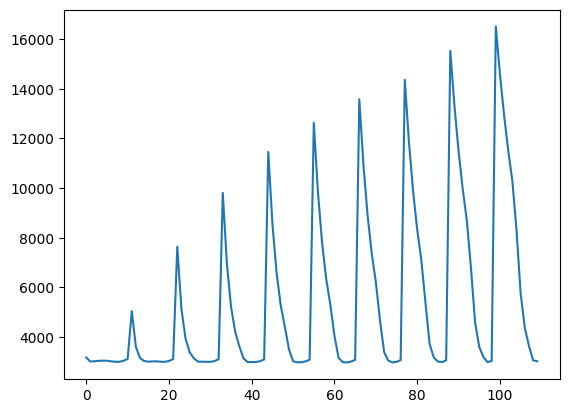

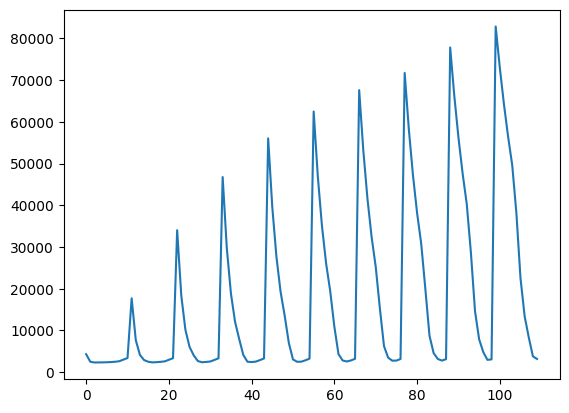

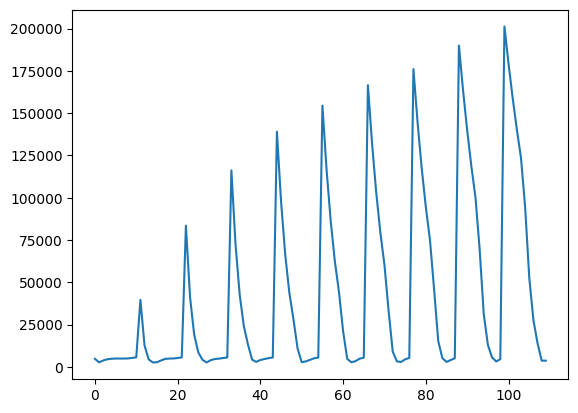

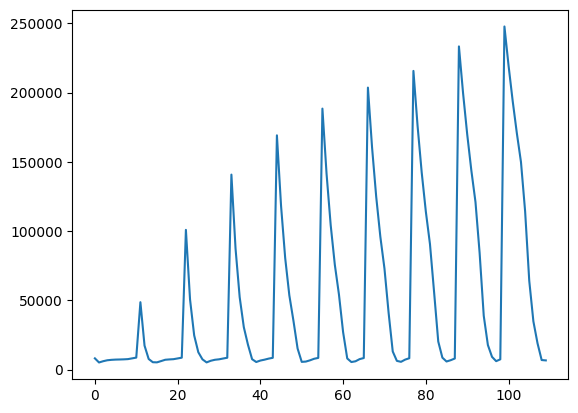

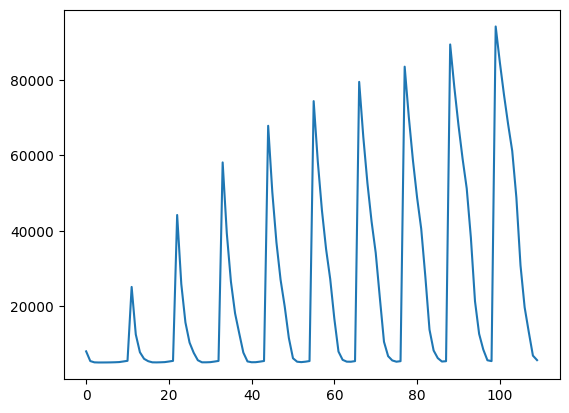

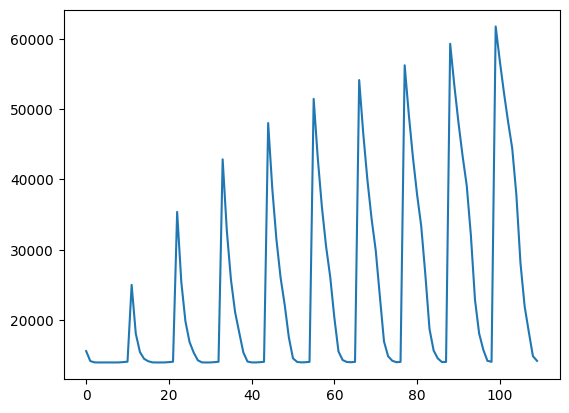

In [ ]:
for i in range(len(minimum_model_ids)):
  fig, ax = plt.subplots()
  plt.plot(complete_model_dict['Chi2_Integral'][i])

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipython-input-3321333598.py:8: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('Wavelength [$\AA$]')
/tmp/ipython-input-3321333598.py:9: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('Flux [$erg/s/cm^2/\AA$')


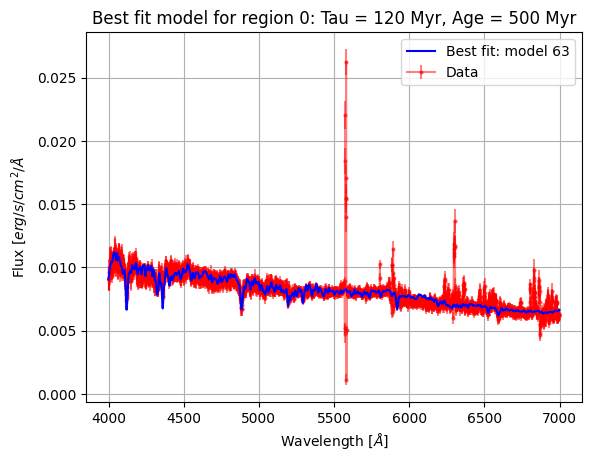

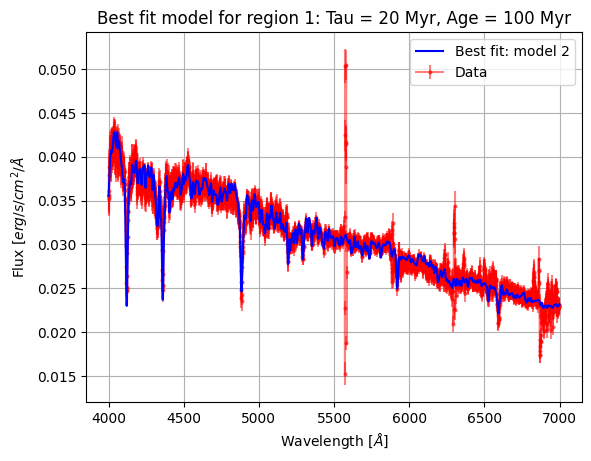

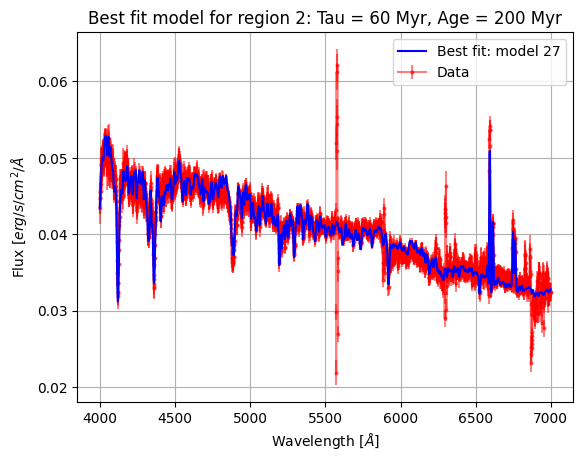

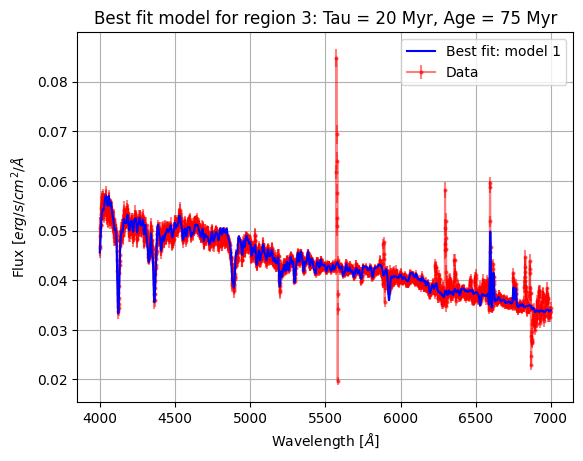

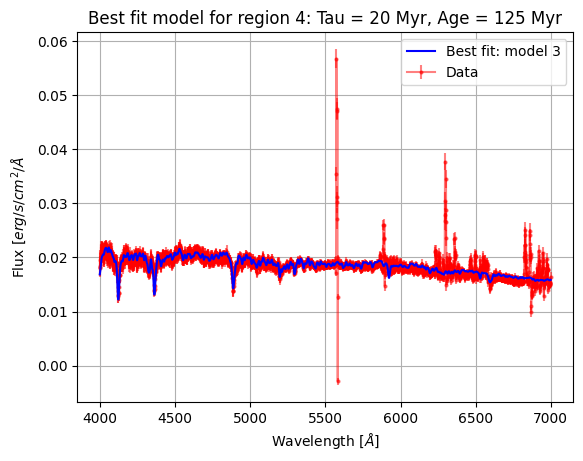

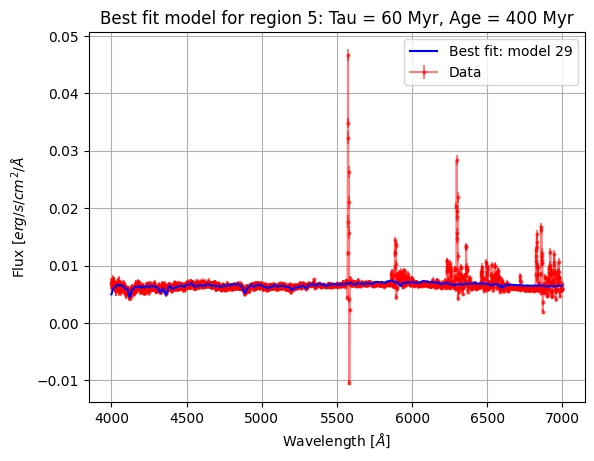

In [36]:
for i in range(len(minimum_model_ids)):
  id = minimum_model_ids[i]
  fig, ax = plt.subplots()
  plt.errorbar(complete_region_dict['Wavelength'][i], complete_region_dict['Flux'][i], yerr = complete_region_dict['Error'][i], color='red', marker='o', markersize=2, label='Data', alpha=0.5)
  plt.plot(complete_model_dict['Wavelength'][i][0], complete_model_dict['Flux'][i][id]/complete_model_dict['Constants'][i][id], color='blue', label='Best fit: model '+str(id), zorder=5)
  ax.legend()
  ax.grid()
  ax.set_xlabel('Wavelength [$\AA$]')
  ax.set_ylabel('Flux [$erg/s/cm^2/\AA$')
  ax.set_title('Best fit model for region '+ str(i) + ': Tau = '+str(complete_model_dict['Qtau'][i][id]) + ' Myr, Age = ' + str(complete_model_dict['Qage'][i][id]) + ' Myr')

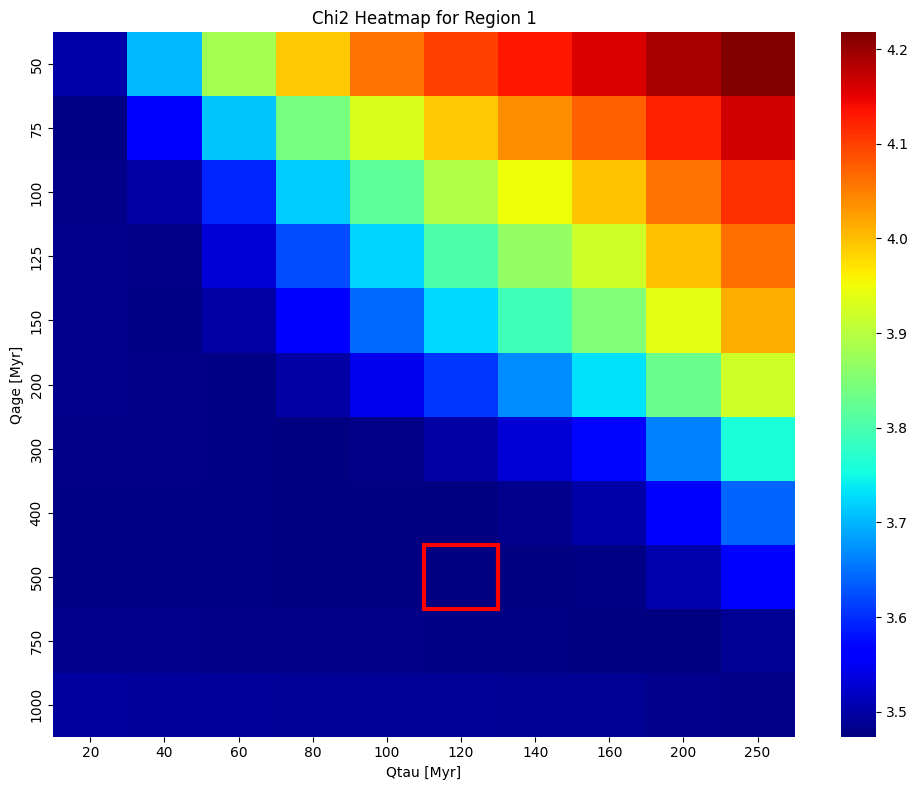

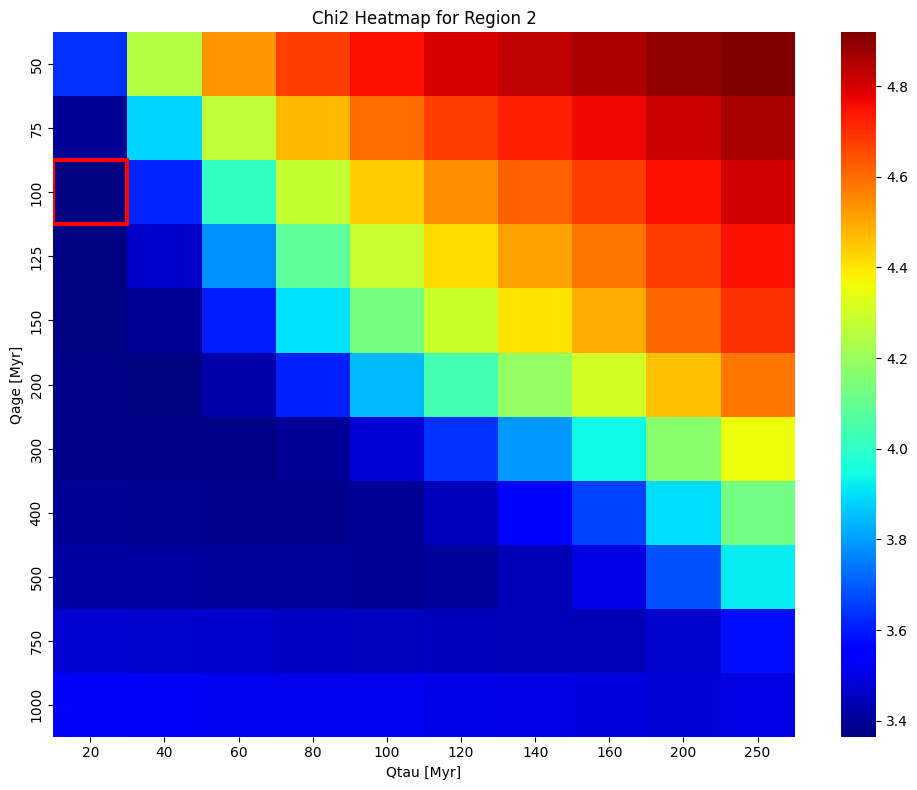

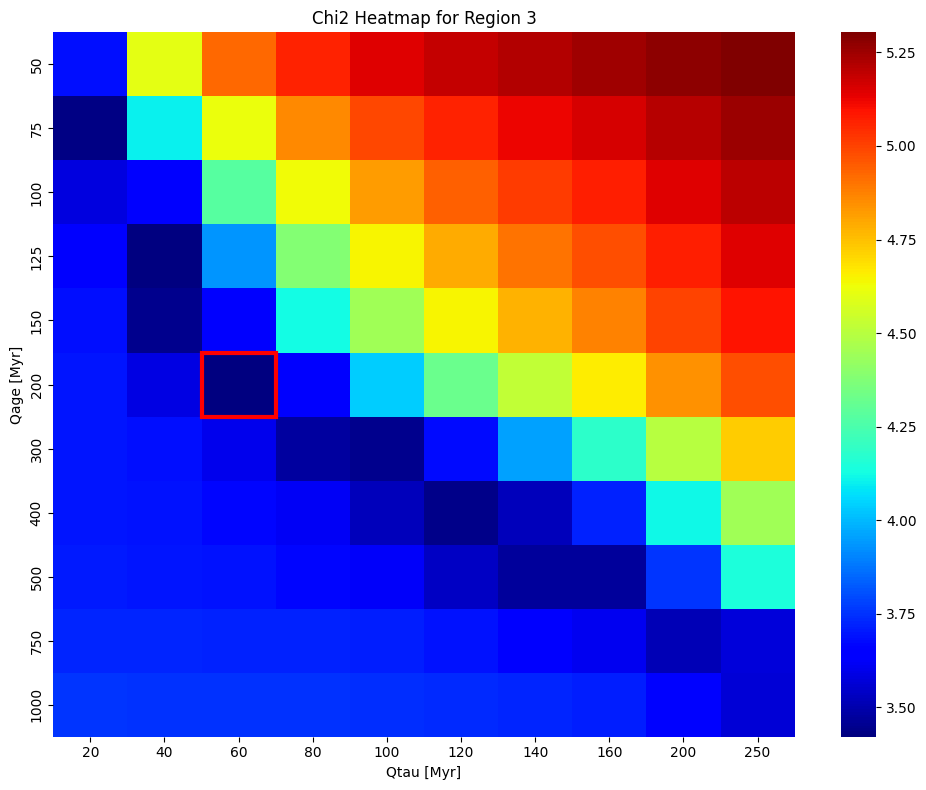

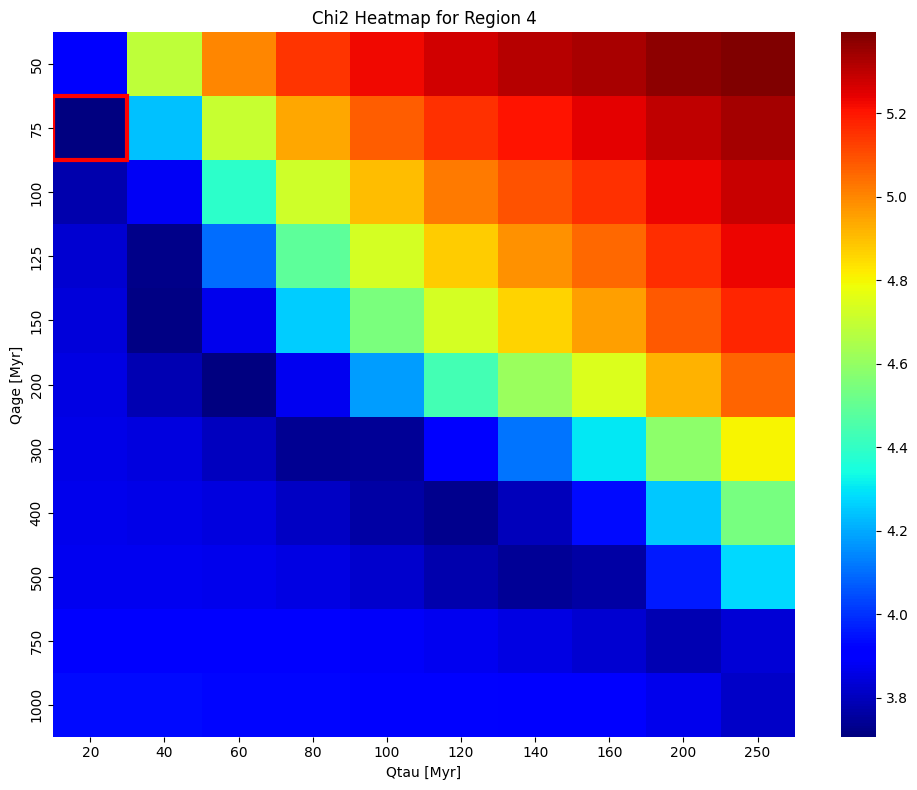

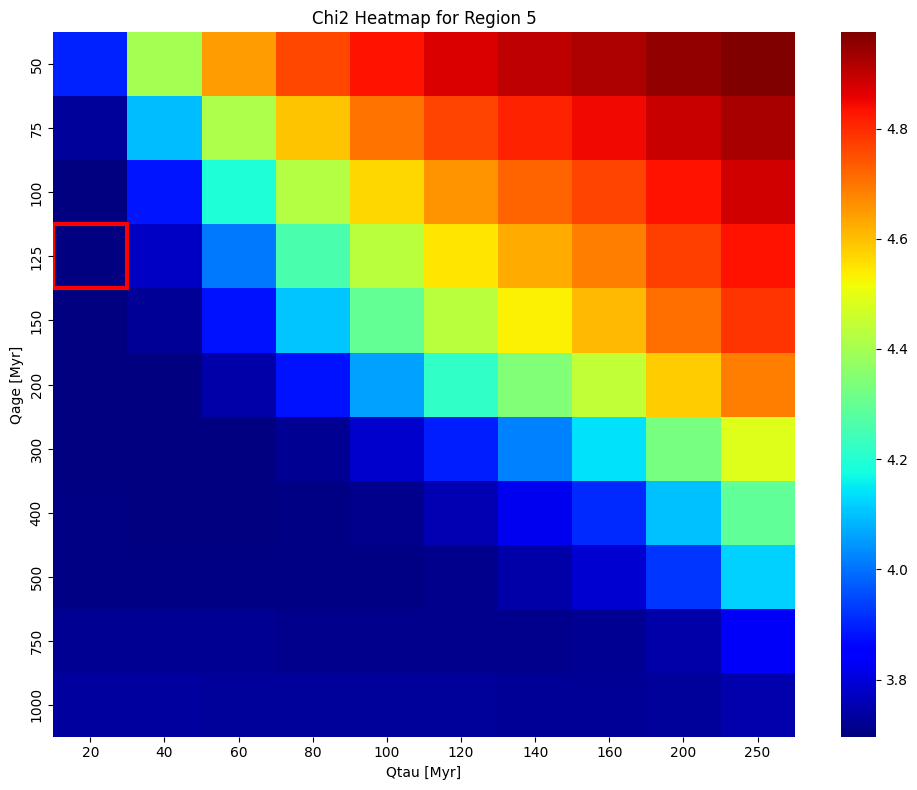

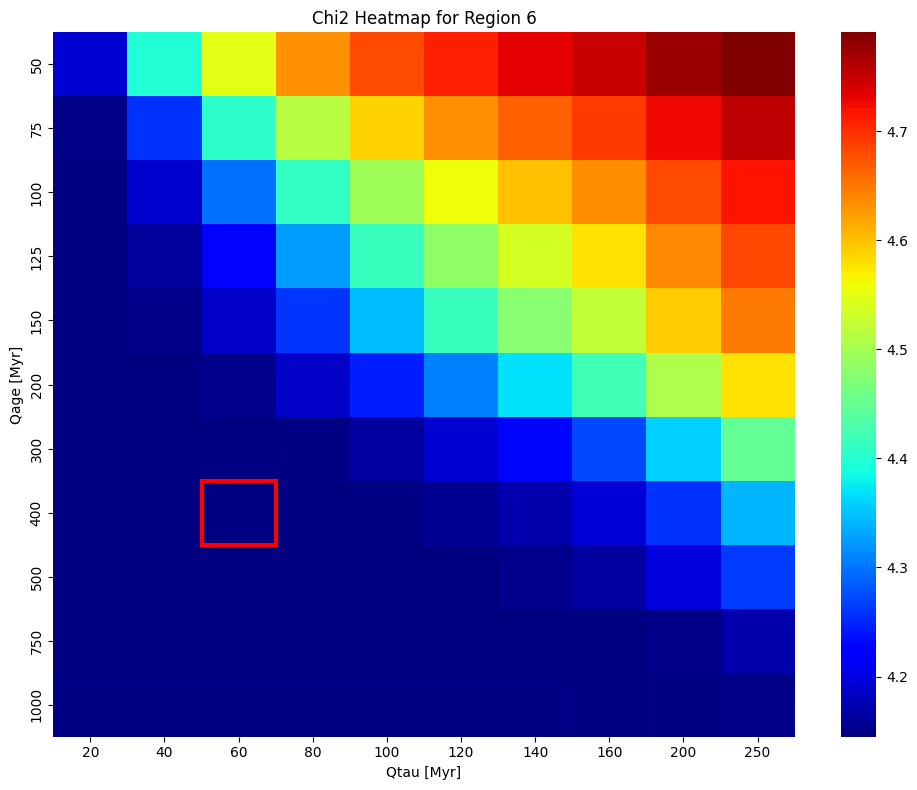

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.patches as patches

for i in range(len(complete_model_dict['Qage'])):
  # Create a DataFrame for the current region's Qage, Qtau, and Chi2_Integral
  df_region = pd.DataFrame({
      'Qage': complete_model_dict['Qage'][i],
      'Qtau': complete_model_dict['Qtau'][i],
      'Chi2_Integral': np.log10(complete_model_dict['Chi2_Integral'][i])
  })

  # Pivot the DataFrame to get the data in a suitable format for heatmap
  heatmap_data = df_region.pivot(index='Qage', columns='Qtau', values='Chi2_Integral')

  fig, ax = plt.subplots(figsize=(10, 8)) # Create a new figure and axes for each heatmap
  sns.heatmap(heatmap_data, cmap='jet', ax=ax)
  ax.set_title(f'Chi2 Heatmap for Region {i+1}') # Add a descriptive title
  ax.set_xlabel('Qtau [Myr]')
  ax.set_ylabel('Qage [Myr]')

  # Find the row with the minimum Chi2_Integral
  min_chi2_row = df_region.loc[df_region['Chi2_Integral'].idxmin()]
  min_qage = min_chi2_row['Qage']
  min_qtau = min_chi2_row['Qtau']

  # Get the integer indices for Qage and Qtau in the pivoted data
  qage_idx = heatmap_data.index.get_loc(min_qage)
  qtau_idx = heatmap_data.columns.get_loc(min_qtau)

  # Create a rectangle patch to highlight the minimum chi2 square
  rect = patches.Rectangle((qtau_idx, qage_idx), 1, 1, linewidth=3, edgecolor='red', facecolor='none')
  ax.add_patch(rect)

  plt.tight_layout() # Adjust layout to prevent labels overlapping
  plt.show() # Display the plot

In [131]:
photometry_file = fits.open(path_task2+'/Phot_N4330.fits')
photometry_file[0].header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                 1652 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

In [143]:
photo_table = photometry_file[1].data
band_keys = ['f_FUV', 'f_NUV', 'f_U', 'f_G', 'f_I', 'f_Z', 'f_IRAC1', 'f_IRAC4']
error_keys = ['e_FUV', 'e_NUV', 'e_U', 'e_G', 'e_I', 'e_Z', 'e_IRAC1', 'e_IRAC4']

photo_fluxes = []
photo_errors = []

for i in range(len(band_keys)):
  bk = band_keys[i]
  ek = error_keys[i]

  photo_flux_band = photo_table[bk]
  photo_error_band = photo_table[ek]

  photo_fluxes.append(photo_flux_band)
  photo_errors.append(photo_error_band)

In [145]:
# fitting the photometry

complete_model_dict['Photo_Chi2_Integral'] = []

num_regions = len(complete_model_dict['Photometry'])
num_bands = len(band_keys)

for i in range(num_regions): # Iterate through each region
  # photo_fluxes[band_idx][i] gives the flux for a specific band for the current region i
  observed_fluxes_for_region_i = np.array([photo_fluxes[band_idx][i] for band_idx in range(num_bands)])
  observed_errors_for_region_i = np.array([photo_errors[band_idx][i] for band_idx in range(num_bands)])

  # Call calc_chi2integ_photometry once per region.
  # It takes:
  # 1. observed_fluxes_for_region_i: An array of 8 fluxes for region 'i'.
  # 2. complete_model_dict['Photometry'][i]: A list of 110 arrays, where each array is the 8 model fluxes for a specific model for region 'i'.
  # 3. observed_errors_for_region_i: An array of 8 errors for region 'i'.
  this_region_integ = calc_chi2integ_photometry(
      observed_fluxes_for_region_i,
      complete_model_dict['Photometry'][i],
      observed_errors_for_region_i
  )
  complete_model_dict['Photo_Chi2_Integral'].append(this_region_integ)

In [146]:
minimum_chis = []
minimum_model_ids = []

for i in range(len(complete_model_dict['Photo_Chi2_Integral'])):
  min_chi_region = min(complete_model_dict['Photo_Chi2_Integral'][i])
  min_chi_region_index = complete_model_dict['Photo_Chi2_Integral'][i].index(min_chi_region)

  minimum_chis.append(min_chi_region)
  minimum_model_ids.append(min_chi_region_index)

In [147]:
minimum_model_ids

[85, 15, 15, 1, 28, 18]

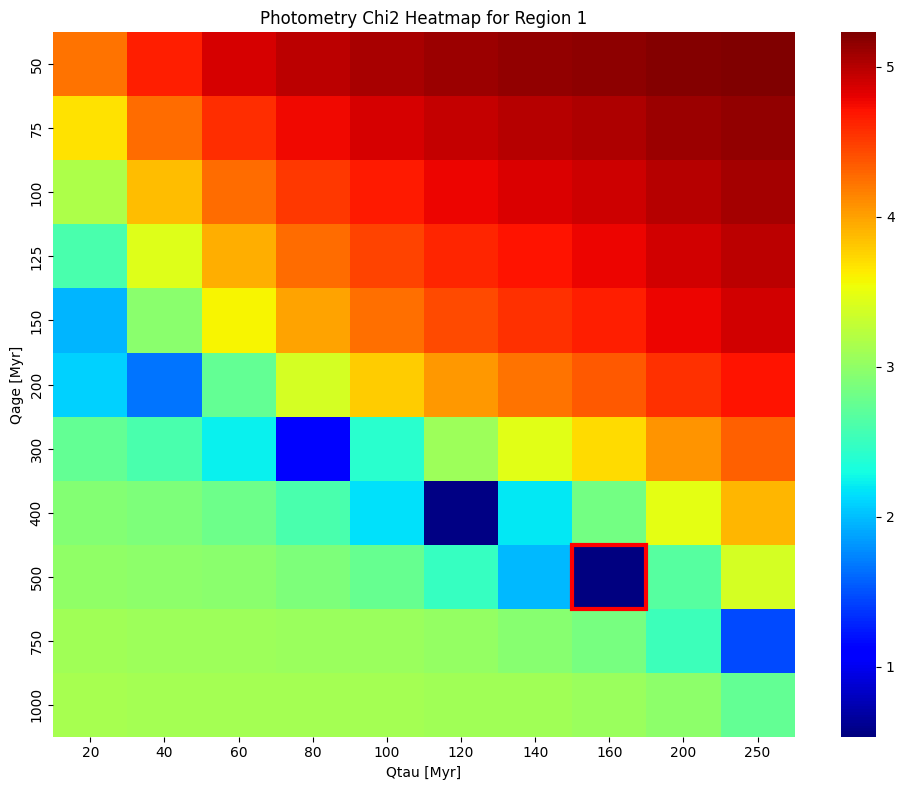

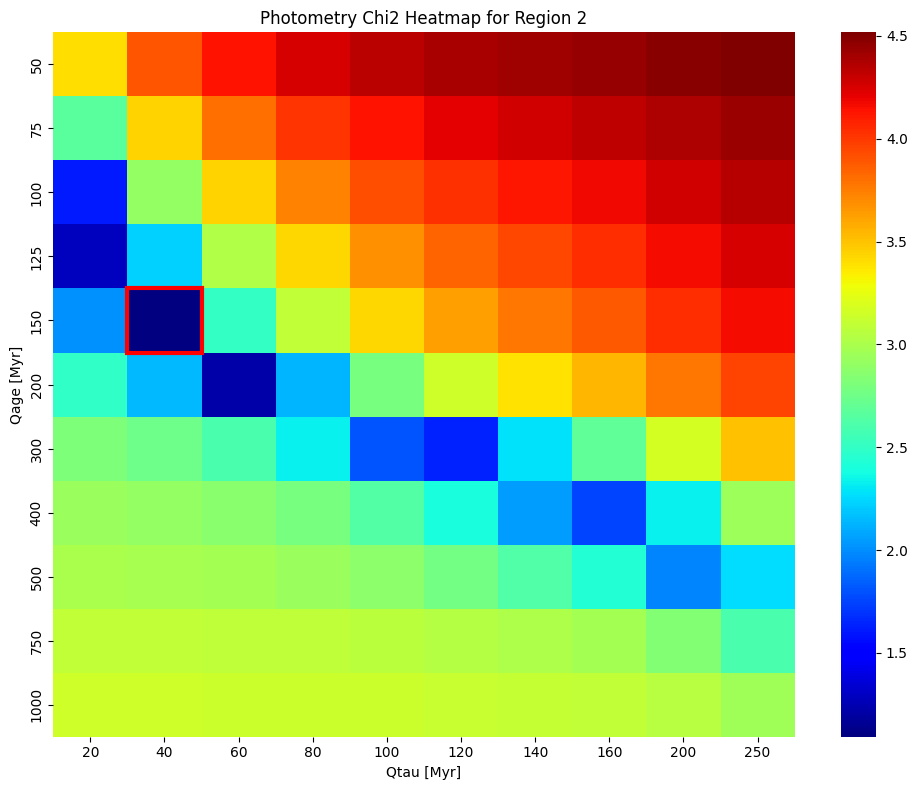

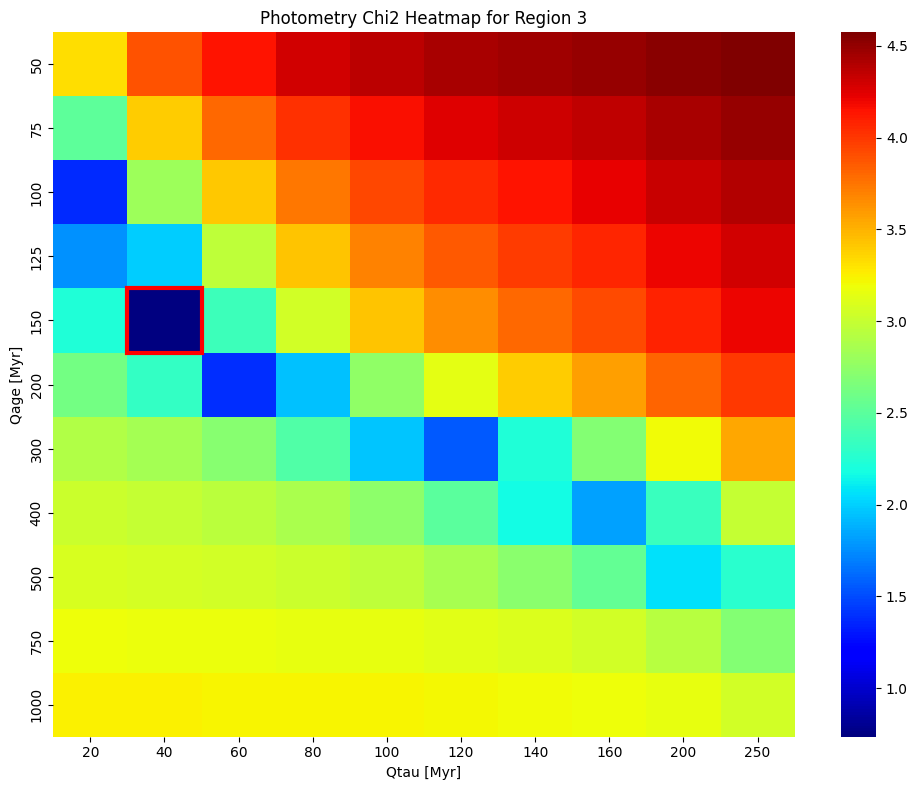

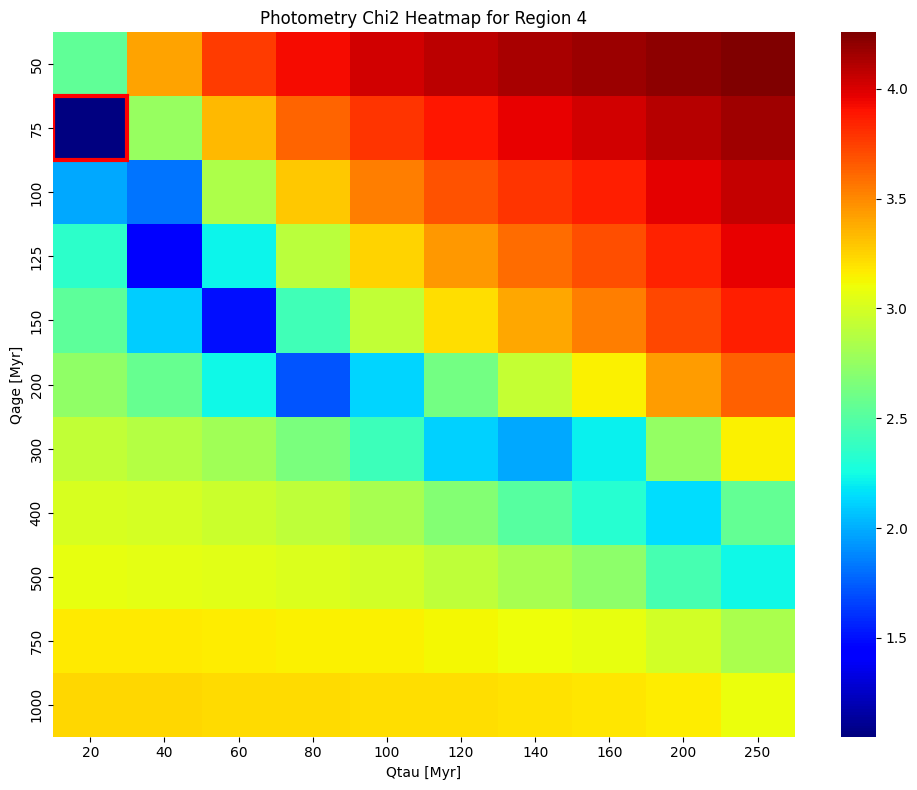

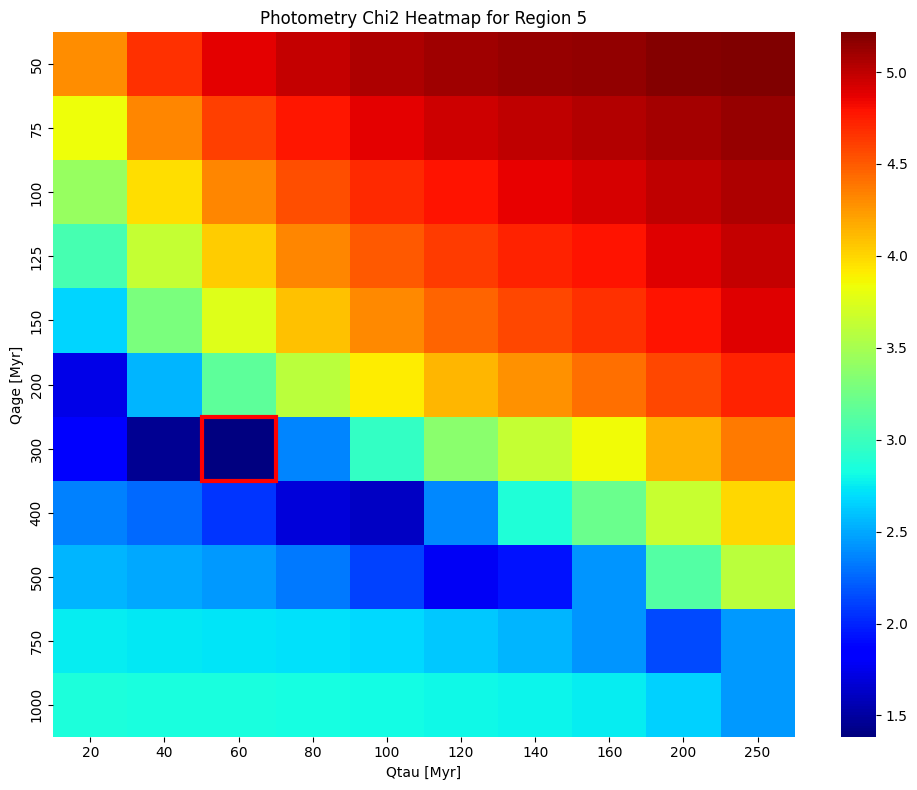

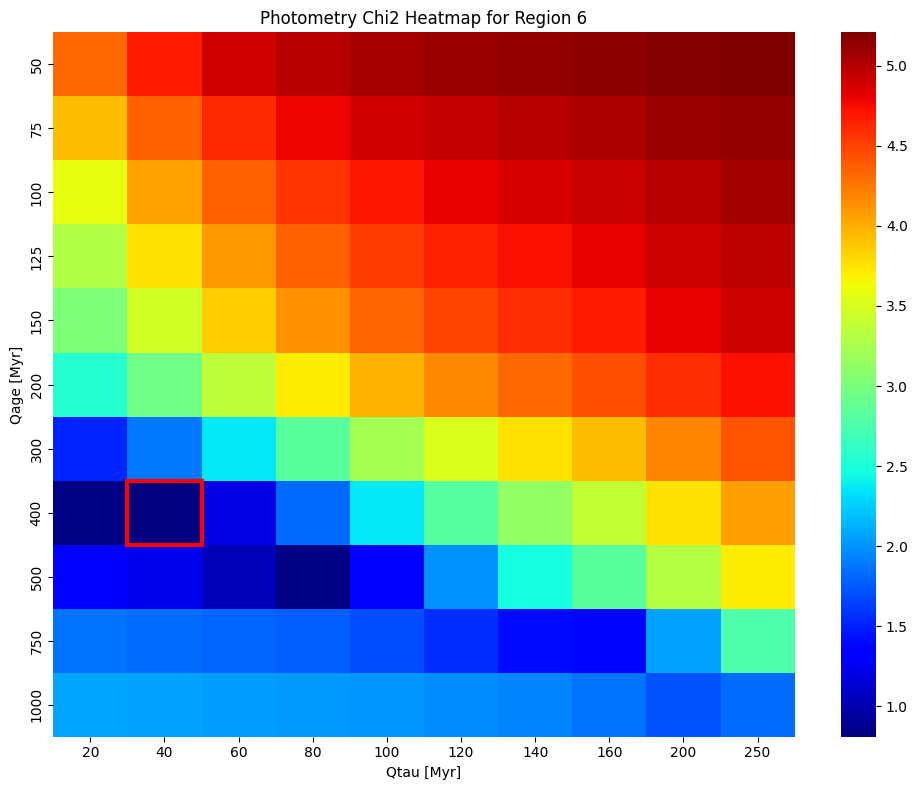

In [148]:
for i in range(len(complete_model_dict['Qage'])):
  # Create a DataFrame for the current region's Qage, Qtau, and Chi2_Integral
  df_region = pd.DataFrame({
      'Qage': complete_model_dict['Qage'][i],
      'Qtau': complete_model_dict['Qtau'][i],
      'Photo_Chi2_Integral': np.log10(complete_model_dict['Photo_Chi2_Integral'][i])
  })

  # Pivot the DataFrame to get the data in a suitable format for heatmap
  heatmap_data = df_region.pivot(index='Qage', columns='Qtau', values='Photo_Chi2_Integral')

  fig, ax = plt.subplots(figsize=(10, 8)) # Create a new figure and axes for each heatmap
  sns.heatmap(heatmap_data, cmap='jet', ax=ax)
  ax.set_title(f'Photometry Chi2 Heatmap for Region {i+1}') # Add a descriptive title
  ax.set_xlabel('Qtau [Myr]')
  ax.set_ylabel('Qage [Myr]')

  # Find the row with the minimum Chi2_Integral
  min_chi2_row = df_region.loc[df_region['Photo_Chi2_Integral'].idxmin()]
  min_qage = min_chi2_row['Qage']
  min_qtau = min_chi2_row['Qtau']

  # Get the integer indices for Qage and Qtau in the pivoted data
  qage_idx = heatmap_data.index.get_loc(min_qage)
  qtau_idx = heatmap_data.columns.get_loc(min_qtau)

  # Create a rectangle patch to highlight the minimum chi2 square
  rect = patches.Rectangle((qtau_idx, qage_idx), 1, 1, linewidth=3, edgecolor='red', facecolor='none')
  ax.add_patch(rect)

  plt.tight_layout() # Adjust layout to prevent labels overlapping
  plt.show()